# Notebook 04: Modelado y Clasificación

**Prueba Técnica - Modelador Junior**

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, confusion_matrix, classification_report
import joblib
import warnings

# Configuración
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


In [2]:
df = pd.read_csv('../data/processed/dataset_final.csv')
df['date_requested'] = pd.to_datetime(df['date_requested'])
df['date_prediction'] = pd.to_datetime(df['date_prediction'])
print(f'Dataset: {df.shape}')

Dataset: (56, 33)


In [3]:
exclude = ['date_requested', 'date_prediction', 'direction_real', 'value_at_request', 'value_at_prediction']
X = df[[c for c in df.columns if c not in exclude]]
y = df['direction_real']
print(f'X: {X.shape}, y: {y.shape}')

X: (56, 28), y: (56,)


In [6]:
# Verificar valores nulos
print(f'Valores nulos en X: {X.isnull().sum().sum()}')

# Split temporal (70% train, 30% test )
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    shuffle=False, 
    random_state=42)

print(f'\nTrain: {X_train.shape}, Test: {X_test.shape}')
print(f'Proporcion train/test: {len(X_train)/len(X):.1%} / {len(X_test)/len(X):.1%}')

Valores nulos en X: 0

Train: (39, 28), Test: (17, 28)
Proporcion train/test: 69.6% / 30.4%


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('Scaled')

Scaled


## Logistic Regression

In [8]:
lr = LogisticRegression(
    random_state=42, 
    max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

In [29]:
print('LOGISTIC REGRESSION')
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_lr, zero_division=0):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_lr, zero_division=0):.2f}')
print(f'F1: {f1_score(y_test, y_pred_lr, zero_division=0):.2f}')
print(f'R2: {r2_score(y_test, y_proba_lr):.2f}')

cm_lr = confusion_matrix(y_test, y_pred_lr)


LOGISTIC REGRESSION
Accuracy: 0.65
Precision: 0.40
Recall: 0.40
F1: 0.40
R2: -0.46


## Random Forest

In [14]:
rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    max_depth=5)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [31]:
print('RANDOM FOREST')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_rf, zero_division=0):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_rf, zero_division=0):.4f}')
print(f'F1: {f1_score(y_test, y_pred_rf, zero_division=0):.4f}')
print(f'R2: {r2_score(y_test, y_proba_rf):.4f}')

cm_rf = confusion_matrix(y_test, y_pred_rf)

RANDOM FOREST
Accuracy: 0.7647
Precision: 0.6000
Recall: 0.6000
F1: 0.6000
R2: 0.1638


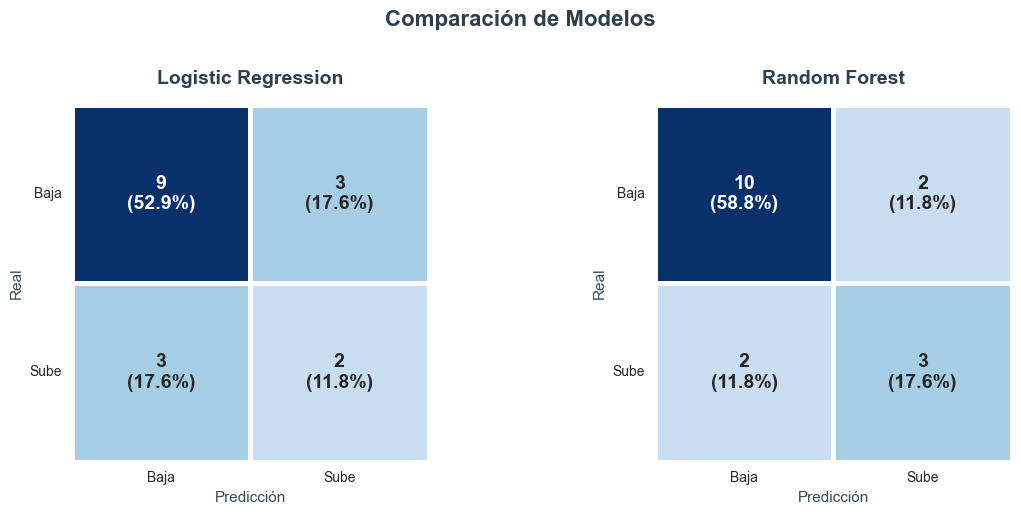

In [28]:
## Matrices de Confusión

def plot_confusion_matrix_clean(cm, title, ax):
    
    # Calcular porcentajes
    cm_percent = cm.astype('float') / cm.sum() * 100
    
    # Crear anotaciones con valor y porcentaje
    labels = np.array([[f'{value}\n({percent:.1f}%)' 
                       for value, percent in zip(row_cm, row_pct)]
                      for row_cm, row_pct in zip(cm, cm_percent)])
    
    # Heatmap 
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', 
                cbar=False, square=True, ax=ax,
                linewidths=2.5, linecolor='white',
                annot_kws={'size': 14, 'weight': 'bold'},
                vmin=0, vmax=cm.sum()/2)
    
    # Título y etiquetas
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15, color='#2c3e50')
    ax.set_xlabel('Predicción', fontsize=11, color='#34495e')
    ax.set_ylabel('Real', fontsize=11, color='#34495e')
    ax.set_xticklabels(['Baja', 'Sube'], fontsize=10)
    ax.set_yticklabels(['Baja', 'Sube'], fontsize=10, rotation=0)

# Crear figura con espaciado balanceado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Comparación de Modelos', fontsize=16, fontweight='bold', y=1.02, color='#2c3e50')

plot_confusion_matrix_clean(cm_lr, 'Logistic Regression', axes[0])
plot_confusion_matrix_clean(cm_rf, 'Random Forest', axes[1])

plt.tight_layout()
plt.savefig('../outputs/figures/07_confusion_matrices_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


## Comparación y Selección

In [34]:
f1_lr = f1_score(y_test, y_pred_lr, zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=0)
print(f'F1 Logistic Regression: {f1_lr:.4f}')
print(f'F1 Random Forest:       {f1_rf:.4f}')
best = 'Random Forest' if f1_rf > f1_lr else 'Logistic Regression'
print(f'\nMejor modelo: {best}')

F1 Logistic Regression: 0.4000
F1 Random Forest:       0.6000

Mejor modelo: Random Forest


## Feature Importance - Top 5

In [11]:
if f1_rf > f1_lr:
    importances = rf.feature_importances_
    modelo_final = rf
else:
    importances = np.abs(lr.coef_[0])
    modelo_final = lr

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values('importance', ascending=False).reset_index(drop=True)

print('\nTOP 5 FEATURES MÁS IMPORTANTES:')
for idx, row in feature_importance.head(5).iterrows():
    print(f'{idx+1}. {row["feature"]}: {row["importance"]:.4f}')


TOP 5 FEATURES MÁS IMPORTANTES:
1. AA6KBD_pct_change: 0.1389
2. avg_pct_change: 0.1223
3. avg_change: 0.1160
4. IPBG4J_change: 0.0925
5. AA6KBD_change: 0.0860


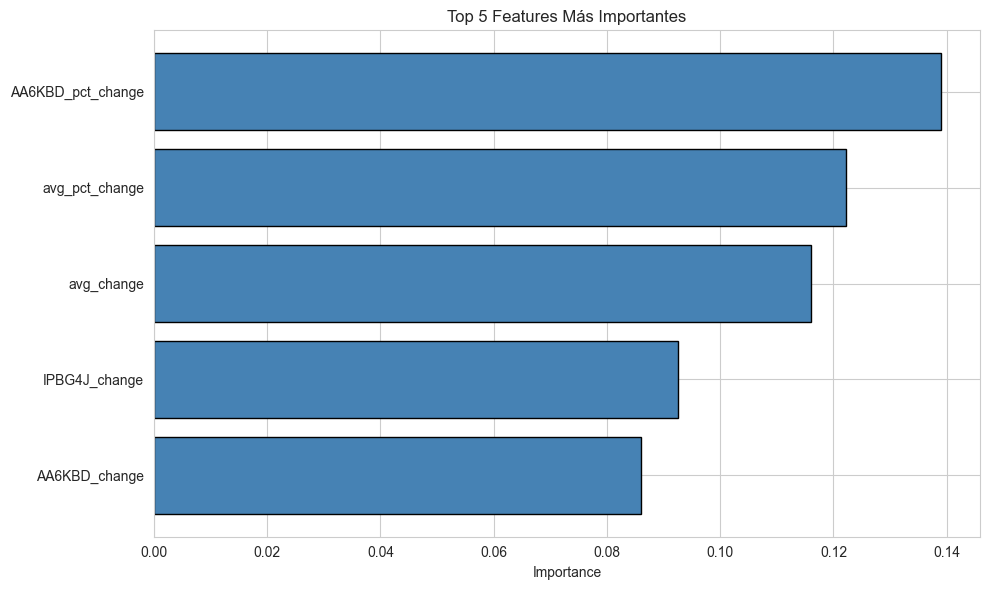

In [12]:
plt.figure(figsize=(10, 6))
top5 = feature_importance.head(5)
plt.barh(top5['feature'], top5['importance'], color='steelblue', edgecolor='black')
plt.xlabel('Importance')
plt.title('Top 5 Features Más Importantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../outputs/figures/06_feature_importance.png', dpi=300)
plt.show()

In [14]:
joblib.dump(modelo_final, '../data/results/modelo_final.pkl')
joblib.dump(scaler, '../data/results/scaler.pkl')


['../data/results/scaler.pkl']